# Abstract

**Author:** [Charles Tapley Hoyt](https://github.com/cthoyt)

**Estimated Run Time:** 2 minutes

This notebook explores methods of comparing subgraphs and identifying meaningful overlaps between them.

### Notebook Setup

In [1]:
import logging
import os
import sys
import time
from collections import Counter, defaultdict
from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns

import pybel
import pybel_tools as pbt
from pybel.constants import *
from pybel_tools.visualization import to_jupyter
from pybel_tools.utils import barh, barv

In [2]:
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Notebook Provenance

The time of execution and the versions of the software packegs used are displayed explicitly.

In [3]:
time.asctime()

'Sun Aug 27 12:25:58 2017'

In [4]:
pybel.__version__

'0.7.3-dev'

In [5]:
pbt.__version__

'0.2.2-dev'

### Local Path Definitions

To make this notebook interoperable across many machines, locations to the repositories that contain the data used in this notebook are referenced from the environment, set in `~/.bashrc` to point to the place where the repositories have been cloned. Assuming the repositories have been `git clone`'d into the `~/dev` folder, the entries in `~/.bashrc` should look like:

```bash
...
export BMS_BASE=~/dev/bms
...
```

#### BMS 

The biological model store (BMS) is the internal Fraunhofer SCAI repository for keeping BEL models under version control. It can be downloaded from https://tor-2.scai.fraunhofer.de/gf/project/bms/

In [6]:
bms_base = os.environ["BMS_BASE"]

## Data

The Alzheimer's Disease Knowledge Assembly has been precompiled with the following command line script, and will be loaded from this format for improved performance. In general, derived data, such as the gpickle representation of a BEL script, are not saved under version control to ensure that the most up-to-date data is always used.

```sh
pybel convert --path "$BMS_BASE/aetionomy/alzheimers.bel" --pickle "$BMS_BASE/aetionomy/alzheimers.gpickle"
```

The BEL script can also be compiled from inside this notebook with the following python code:

```python
>>> import os
>>> import pybel
>>> # Input from BEL script
>>> bel_path = os.path.join(bms_base, 'aetionomy', 'alzheimers.bel')
>>> graph = pybel.from_path(bel_path)
>>> # Output to gpickle for fast loading later
>>> pickle_path = os.path.join(bms_base, 'aetionomy', 'alzheimers.gpickle')
>>> pybel.to_pickle(graph, pickle_path)
```

In [7]:
pickle_path = os.path.join(bms_base, "aetionomy", "alzheimers", "alzheimers.gpickle")

In [8]:
graph = pybel.from_pickle(pickle_path)

In [9]:
graph.version

'4.0.3'

## Subgraph Overlaps


Possible definitions of subgraph overlap:

1. Sharing a minimum of X bioprocesses
2. Sharing a minimum percentage of nodes
3. Expanded subgraphs share a minimum of X bioprocesses
4. Expanded subgraphs share a minimum percentage of nodes
5. Using candidate generated mechanisms:
    1. Annotate overlapping candidate mechanisms with dogmatic subgraphs
    2. Dogmatic subgraphs sharing an overlapping candidate mechanism are connected

The overlap of edges between each subgraph is quantified with the tanimoto similarity then clustered with `seaborn`.

In [10]:
edge_overlap_data = pbt.summary.summarize_subgraph_edge_overlap(graph, "Subgraph")
edge_overlap_df = pd.DataFrame(edge_overlap_data)

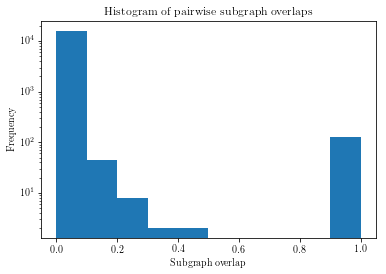

In [11]:
plt.title("Histogram of pairwise subgraph overlaps")
plt.ylabel("Frequency")
plt.xlabel("Subgraph overlap")
plt.hist(edge_overlap_df.as_matrix().ravel(), log=True)
plt.show()

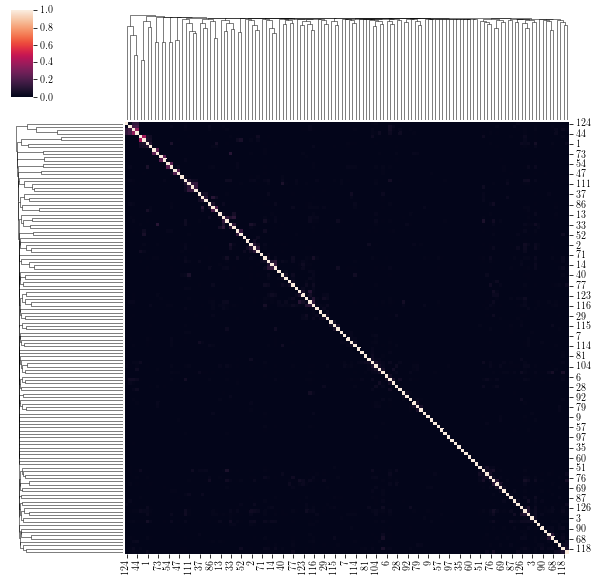

In [12]:
cg = sns.clustermap(edge_overlap_df.as_matrix())
plt.show()

The subgraphs are analyzed for overlap by their shared nodes with [pbt.summary.summarize_subgraph_node_overlap](http://pybel-tools.readthedocs.io/en/latest/summary.html#pybel_tools.summary.summarize_subgraph_node_overlap). Ultimately, there isn't a huge overlap by node definitions. By using the expansion workflow from before, subgraph distances can be more readily calculated.

In [13]:
node_overlap_data = pbt.summary.summarize_subgraph_node_overlap(graph)
node_overlap_df = pd.DataFrame(node_overlap_data)

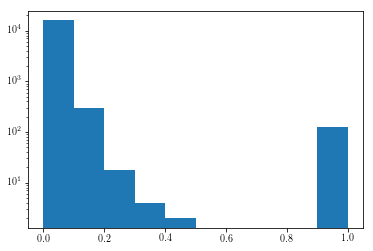

In [14]:
plt.hist(node_overlap_df.as_matrix().ravel(), log=True)
plt.show()

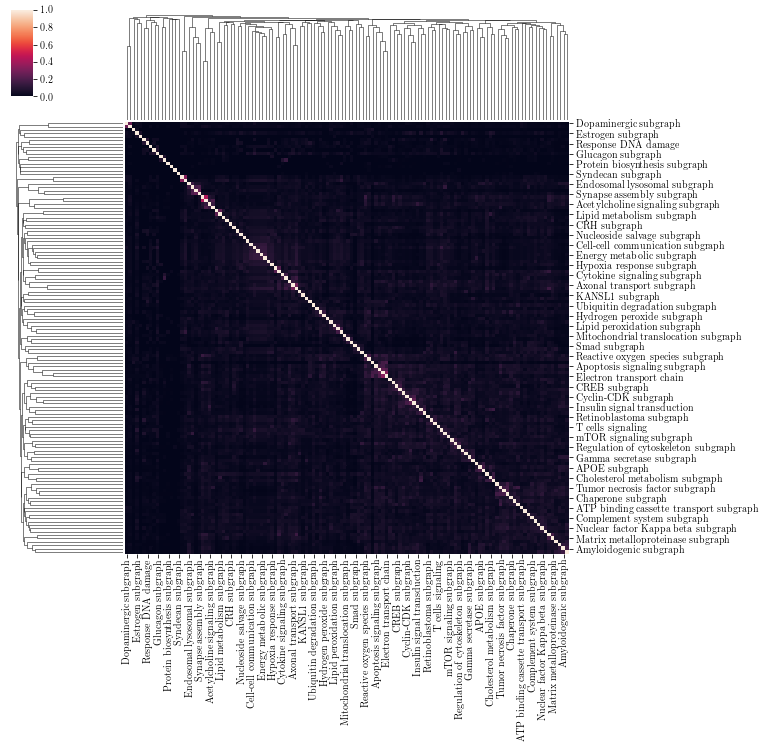

In [15]:
cg = sns.clustermap(node_overlap_data, figsize=(10, 10))
plt.show()